In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
#import theano
from PIL import Image
from numpy import *
# SKLEARN
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [6]:
import os
from PIL import Image

# number of channels
img_channels = 1
#  data
pathImages = "/media/rodrigo/Rodrigo/PAO/VGG/Train/pedestrian/pedestrian_0.jpg"
img = Image.open(pathImages)
img.show()
print(img.size)
img_width, img_height = img.size


(1176, 640)


In [10]:
##image resizing
img_width, img_height = 150, 150

train_data_dir = '/media/rodrigo/Rodrigo/PAO/VGG/Train'
validation_data_dir = '/media/rodrigo/Rodrigo/PAO/VGG/Test'
nb_train_samples = 2211 + 2588
nb_validation_samples = 272 + 211
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [25]:
# this is the augmentation configuration I will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration I will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

#Train data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
#Test data
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('first_try.h5')


Found 4799 images belonging to 2 classes.
Found 483 images belonging to 2 classes.
Epoch 1/50
299/299 [==============================] - 84s 280ms/step - loss: 0.2625 - acc: 0.8880 - val_loss: 0.5014 - val_acc: 0.8354
Epoch 2/50
299/299 [==============================] - 84s 280ms/step - loss: 0.2466 - acc: 0.8944 - val_loss: 0.4237 - val_acc: 0.6895
Epoch 3/50
299/299 [==============================] - 84s 280ms/step - loss: 0.2343 - acc: 0.8976 - val_loss: 0.4228 - val_acc: 0.8480
Epoch 4/50
299/299 [==============================] - 83s 278ms/step - loss: 0.2230 - acc: 0.9059 - val_loss: 0.3032 - val_acc: 0.8501
Epoch 5/50
299/299 [==============================] - 84s 280ms/step - loss: 0.2219 - acc: 0.9091 - val_loss: 0.3927 - val_acc: 0.7281
Epoch 6/50
299/299 [==============================] - 85s 284ms/step - loss: 0.2155 - acc: 0.9061 - val_loss: 0.2640 - val_acc: 0.8844
Epoch 7/50
299/299 [==============================] - 84s 280ms/step - loss: 0.1953 - acc: 0.9172 - val_los

Model Keys:  dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


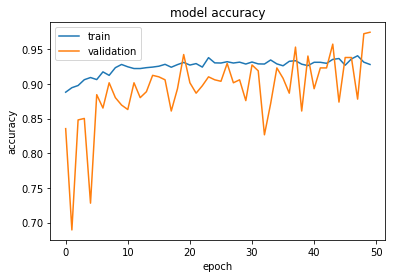

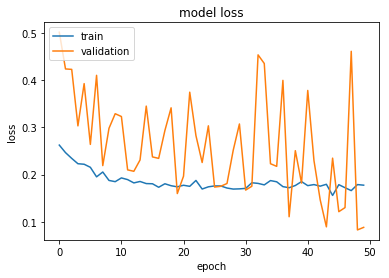

In [26]:
def plotAccuracy (model):
    plt.plot(model.history.history['acc'])
    plt.plot(model.history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
def plotLoss (model):
    plt.plot(model.history.history['loss'])
    plt.plot(model.history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
print("Model Keys: " , model.history.history.keys())
plotAccuracy(model)
plotLoss(model)



In [27]:
from keras.preprocessing import image
from keras.models import load_model
import cv2
import numpy as np
from keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("first_try.h5")
print("Loaded model from disk")

Loaded model from disk
